Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.
4. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.


Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the relationships vary across groups
4. Accompany your plot with a written description of what you see.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
#WINE REVIEWS

wine_150k = pd.read_csv('winemag-data_first150k.csv', index_col=0)
wine_130k = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
df = pd.concat([wine_150k, wine_130k], axis=0, sort=False)

sns.set()

In [41]:
df[:6]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,NaN,NaN,NaN


# Choose one variable and plot that variable four different ways.

__Points__

Distribution
Boxplot


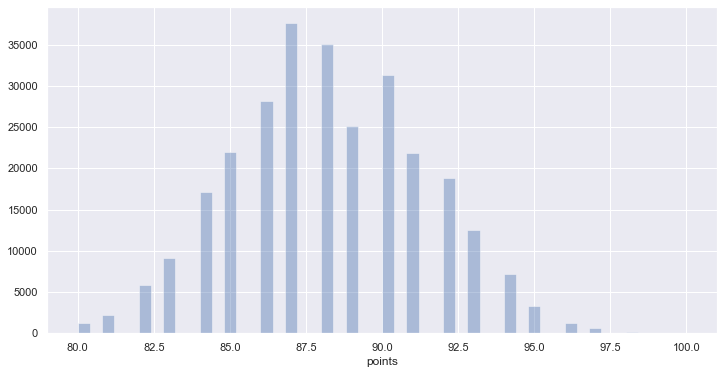

In [4]:
#Histogram
plt.figure(figsize=(12,6))
sns.distplot(df.points, kde=False) 

Pros: Shows a clear, straightforward representation of the points distribution. Shows amounts of wines at each score.

Cons: Provides no further insight.

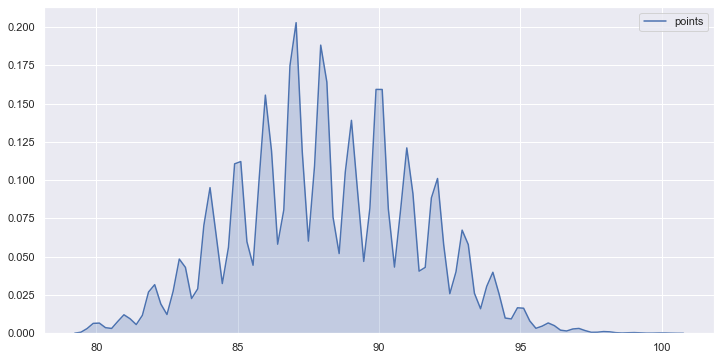

In [5]:
#KDE Plot
plt.figure(figsize=(12,6))
sns.kdeplot(df.points, shade=True)

Pros: Shows kernel density estimation, the probability density function of the variables.

Cons: Won't mean much to someone unfamiliar with statistics.

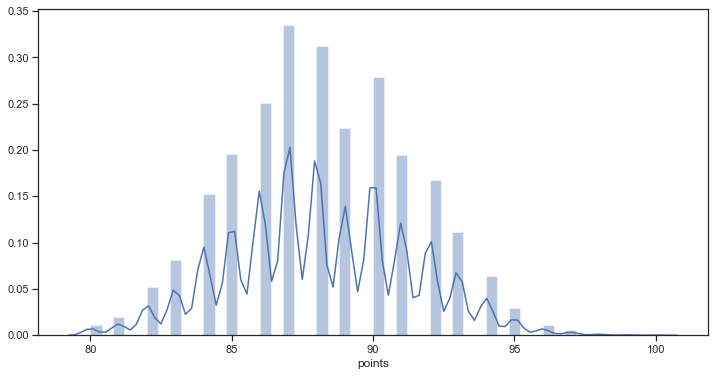

In [6]:
#Histogram/KDE
plt.figure(figsize=(12,6))
sns.set(style='ticks')
sns.distplot(df.points, kde=True)
sns.set()

Pros: Provides both an easy to interpret histogram as well as the kernel densith estimation for those who understand it.

Cons: Appears a bit cluttered even though I removed the grid. Y axis unclear.

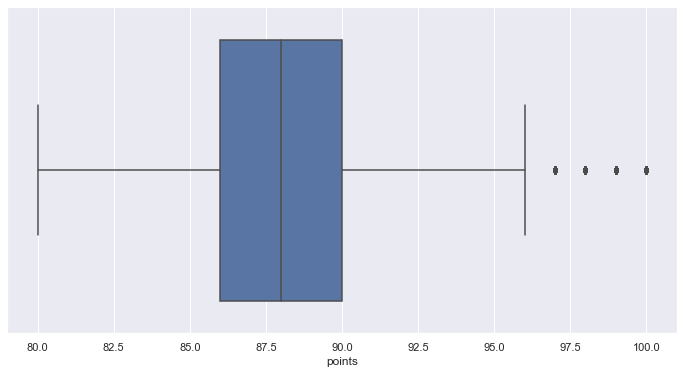

In [7]:
#Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df.points)

Pros: The most elegant solution (in my opinion). Clearly shows the range of scores, the average score as well as the outliers.

Cons: Unlike histogram, unable to see amounts of wines with certain scores.

# Choose two continuous variables, and plot them three different ways.

__Points VS Price__

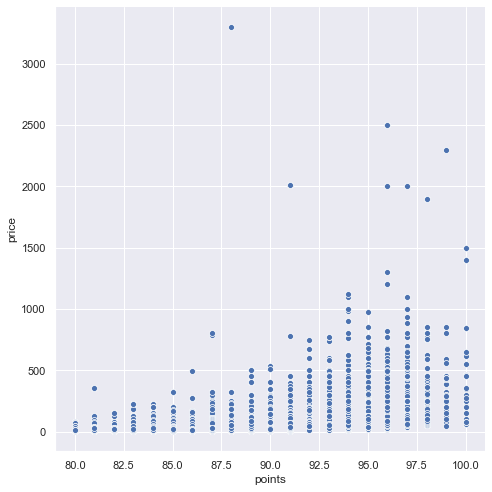

In [42]:
sns.relplot(x='points', y='price', height=7, data=df)

Pros: Can see there are some outliers with high price that do not have the highest scores.

Cons: Trend is less clear.

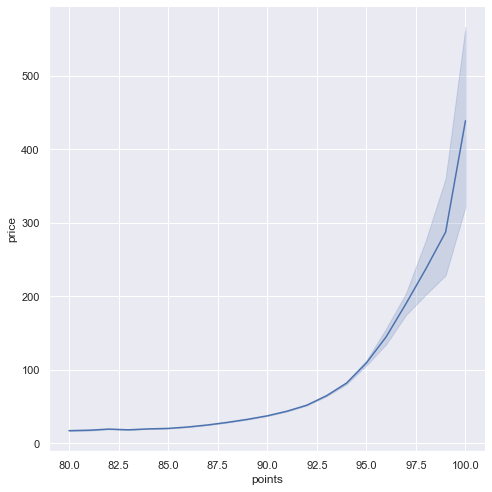

In [9]:
#plt.figure(figsize=(12,6))
sns.relplot(x='points', y='price', kind='line', height=7, data=df)

Pros: Can clearly see the relationship between higher priced wine and higher wine scores.

Cons: Cannot see outliers clearly.

In [10]:
#had to remove NaN vals for this plot to work
#df.dropna(inplace=True)

#plt.figure(figsize=(9,7))
#sns.kdeplot(df.points, df.price)
#shows bivariate

#reset data
#df = pd.read_csv('winemag-data-130k-v2.csv', engine='python')

Pros: Shows kernel density estimation

Cons: Odd/confusing layout

<Figure size 864x432 with 0 Axes>

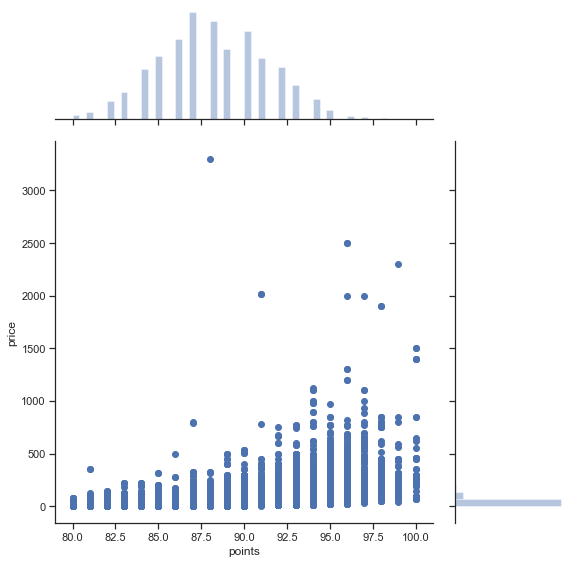

In [11]:
#Jointplot

sns.set(style='ticks')
plt.figure(figsize=(12,6))

#sns.jointplot(x="points", y="price", data=df, kind='kde');
sns.jointplot(x="points", y="price", data=df, height=8, ratio=3, color='b');
sns.set()

Pros: Includes data density, an additional piece of information onto existing scatterplot.

Cons: None?

# Choose one continuous variable and one categorical variable, and plot them six different ways.

Chose __Price VS Country__ since there was the most variance.

In [35]:
country = df.groupby('country')
country_score_avg = country['points'].agg(np.mean)
country_price_avg = country['price'].agg(np.mean)
country_price_var = country['price'].agg(np.var)
country_price_med = country['price'].agg(np.median)

tester = df.groupby('taster_name')
tester_score_avg = tester['points'].agg(np.mean)

cnt_avg = country_price_avg.sort_values(ascending=False).to_frame()
cnt_var = country_price_var.sort_values(ascending=False).to_frame()
cnt_med = country_price_med.sort_values(ascending=False).to_frame()

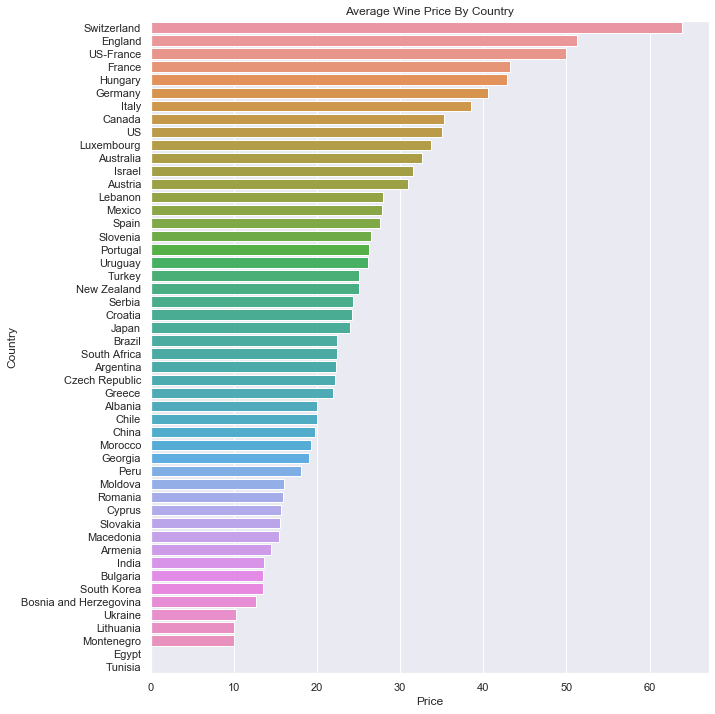

In [13]:
#Barplot AVG Price

plt.figure(figsize=(10,12))
sns.barplot(x=cnt_avg['price'], y=cnt_avg.index)
plt.title('Average Wine Price By Country')
plt.xlabel('Price')
plt.ylabel('Country');

Pros: Very Straightforward and easy to read.

Cons: Not the most exciting looking

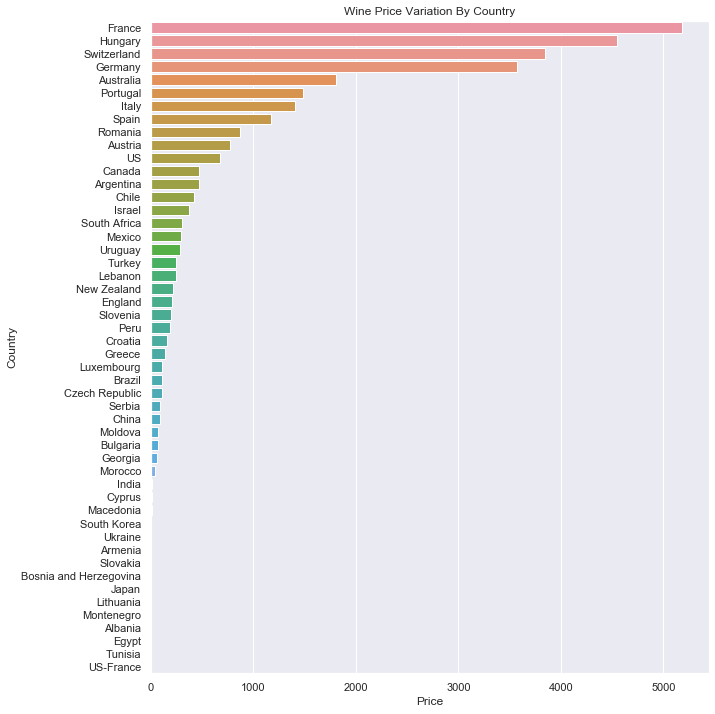

In [14]:
#Barplot Price VAR

plt.figure(figsize=(10,12))

sns.barplot(x=cnt_var['price'], y=cnt_var.index)

plt.title('Wine Price Variation By Country')
plt.xlabel('Price')
plt.ylabel('Country');

Pros: Again, straightforward, easy to read.

Cons: Variation metric may be unclear. Bottom 15 countries have little to no variation - wasted space.

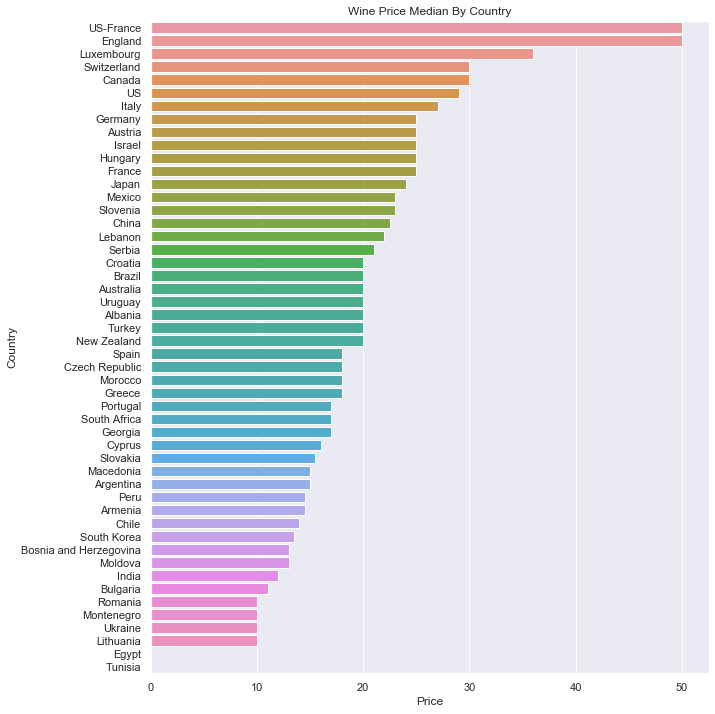

In [36]:
plt.figure(figsize=(10,12))
sns.barplot(x=cnt_med['price'], y=cnt_med.index)
plt.title('Wine Price Median By Country')
plt.xlabel('Price')
plt.ylabel('Country');

Pros: Simple, good looking graph
    
Cons: Bars may not be the most intuitive way to represent median

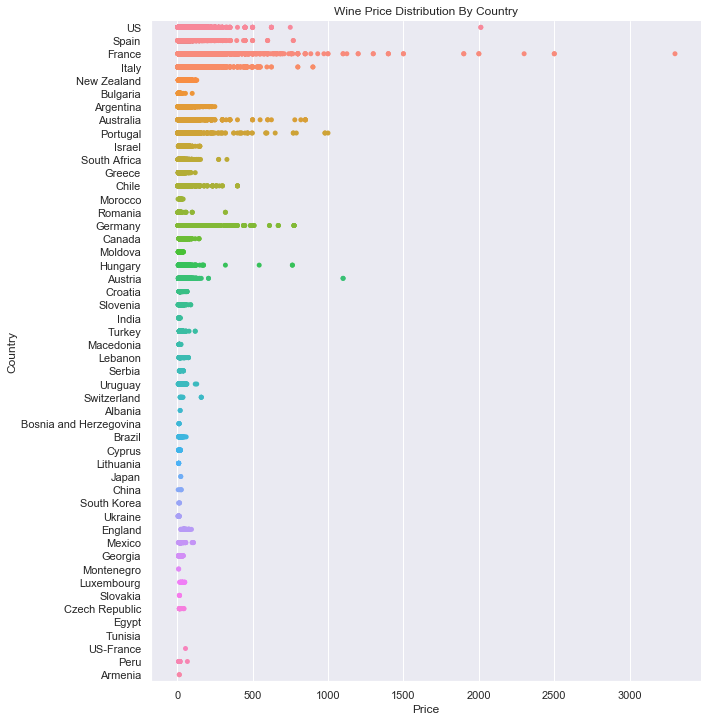

In [15]:
sns.set()
sns.catplot(x="price", y="country", jitter=False, height=10, data=df);
#sns.catplot(df.price, df.country, jitter=False, height=10, data=df);
plt.title('Wine Price Distribution By Country')
plt.xlabel('Price')
plt.ylabel('Country');

Pros: Shows each wine price as a single, accurate point

Cons: Wines at common price points are cluttered - hard to tell what the actual average pricing is

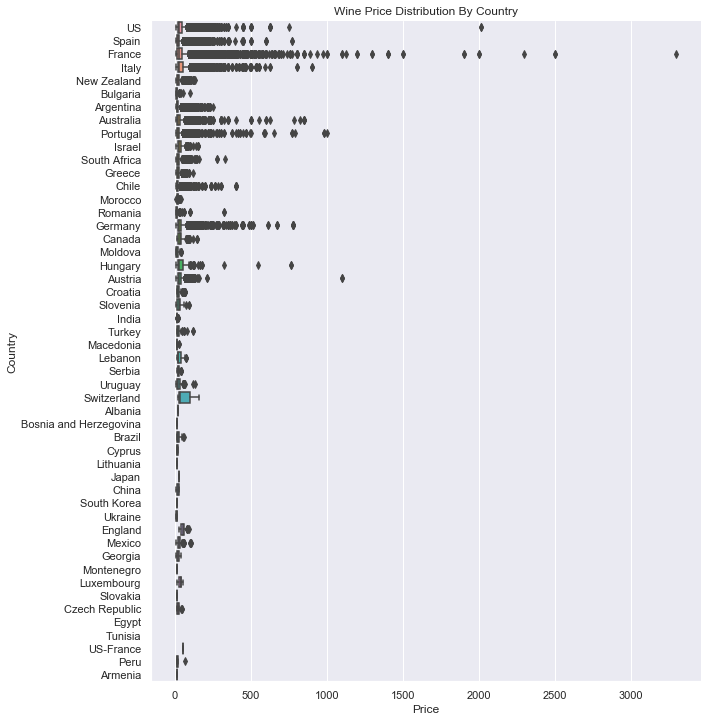

In [26]:
#sns.catplot(df.price, df.country, kind="box");
sns.set()
sns.catplot(x='price', y='country', kind="box", height=10, data=df);
plt.title('Wine Price Distribution By Country')
plt.xlabel('Price')
plt.ylabel('Country');

Pros: Provides a boxplot for each country

Cons: The high amount of countries listed as well as France being a large outlier makes the boxplots small and difficult to read

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

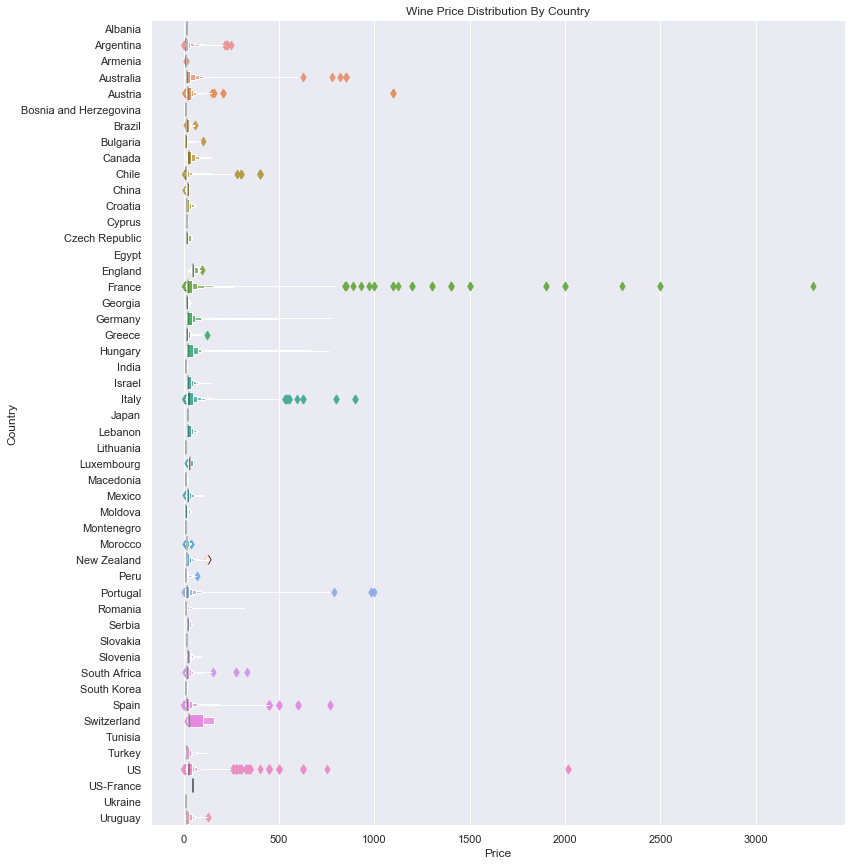

In [40]:
sns.catplot(x="price", y="country", kind="boxen", height=12, data=df.sort_values("country"));
plt.title('Wine Price Distribution By Country')
plt.xlabel('Price')
plt.ylabel('Country');

#IGNORE WARNING

Pros: Provides more information than boxplots

Cons: Again, France skews the data causing the other boxe(n)s to be too small to read

# Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the| relationships vary across groups
4. Accompany your plot with a written description of what you see.

In [37]:
#india crops
df1 = pd.read_csv('india_crops.csv')
df1 = df1.drop("Unnamed: 6", axis=1)
df1[:6]

,Crop,State,Cultivation Cost A2+FL,Cultivation Cost C2,Production Cost C2,Yield (Quintal/Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


__NOTES__

There are several cost concepts that the Commission for Agricultural Costs and Prices (CACP) considers while recommending MSPs of 23 crops.
1. Cost A2 - These are the costs the farmer actually pays out of his/her pocket for buying various inputs ranging from seeds to fertilisers to pesticides to hired labour to hired machinery or even leased-in land.
2. Cost A2 +FL - In agriculture, farmers also use a lot of family labour and if their cost is imputed and added to cost A2, that concept is called cost A2+FL.
3. Cost C2 - the Comprehensive cost (cost C2), it includes imputed costs of family labour, imputed rent of owned land and imputed interest on owned capital.

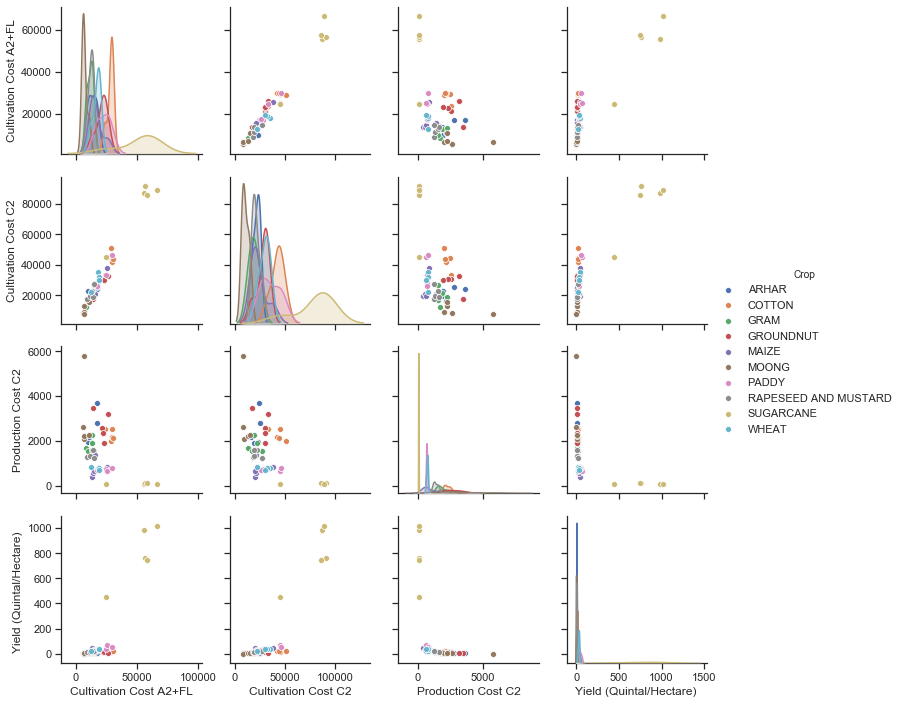

In [22]:
sns.set(style="ticks")
sns.pairplot(df1, hue='Crop', diag_kind='kde')

This scatterplot matrix shows us the relationships between cultivation and production costs of different crops in India and the resulting yield in Quintals per Hectare. We can gather a few notable pieces of information from this plot. Generally, it seems that higher cultivation costs lead to higher yield (or vice versa), while higher production costs are tied to lower yields. One crop, sugarcane, is shown to be an outlier. Sugarcane has the lowest production costs while having the highest yields and cultivation costs per state, by wide margins. One other notable outlier is that one state (Maharashtra) farms significantly more moong than any other state.